## Telco Customer Churn

Link to Dataset: https://www.kaggle.com/blastchar/telco-customer-churn

The data set includes information about:

- Customers who left within the last month – the column is called Churn


- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies


- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges


- Demographic info about customers – gender, age range, and if they have partners and dependents


**Data Preprocessing**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
%load_ext watermark
%watermark -d -u -a '<Micaela>' -v -p numpy

<Micaela> 
last updated: 2021-01-23 

CPython 3.8.5
IPython 7.19.0

numpy 1.19.2


In [3]:
mydata = pd.read_csv("Telco_Customers.csv")

In [4]:
mydata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
mydata.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,1980-KXVPM,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [6]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Observations: 
- Drop Customerid; provides no insight
- TotalCustomers is object; should be float
- Need to do dummy varibles on all object columns and SeniorCitizen

In [7]:
#drop customer id
mydata = mydata.drop('customerID', 1)

In [8]:
mydata[~mydata['TotalCharges'].str.match('^\d*\.?\d*$')].head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [9]:
mydata.loc[488, 'TotalCharges']

' '

In [10]:
# see if any strings in column
mydata[~mydata['TotalCharges'].str.match('^\d*\.?\d*$')]
print("Number of TotalCharges null: ",mydata[~mydata['TotalCharges'].str.match('^\d*\.?\d*$')].shape[0])

Number of TotalCharges null:  11


In [11]:
# drop total charges for new customers (< 1 month);
mydata.drop(mydata[mydata['TotalCharges'] == ' '].index, inplace=True)

# change to dtype to float 
mydata['TotalCharges'] = mydata['TotalCharges'].astype(float)
mydata.shape

(7032, 20)

In [12]:
mydata['TotalCharges'].dtype

dtype('float64')

In [13]:
df = mydata.copy()

# make payment method binary (manuel == 0, automatic == 1)
paymentMethods = df.PaymentMethod.unique()
df['PaymentMethod'] = df["PaymentMethod"].replace(paymentMethods, [0,0,1,1])

def encodeCatVar(df):
    binCols = list(df.select_dtypes(include=['object']))
    for col in binCols:
        df[col] = df[col].astype('category')
        df[col + '_cat'] = df[col].cat.codes
    return df

df = encodeCatVar(df).copy()
pd.set_option('display.max_columns', 5000)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_cat,Partner_cat,Dependents_cat,PhoneService_cat,MultipleLines_cat,InternetService_cat,OnlineSecurity_cat,OnlineBackup_cat,DeviceProtection_cat,TechSupport_cat,StreamingTV_cat,StreamingMovies_cat,Contract_cat,PaperlessBilling_cat,Churn_cat
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,0,29.85,29.85,No,0,1,0,0,1,0,0,2,0,0,0,0,0,1,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,0,56.95,1889.50,No,1,0,0,1,0,0,2,0,2,0,0,0,1,0,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,0,53.85,108.15,Yes,1,0,0,1,0,0,2,2,0,0,0,0,0,1,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,1,42.30,1840.75,No,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,0,70.70,151.65,Yes,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1


**Exploratory Data Analysis (EDA)**

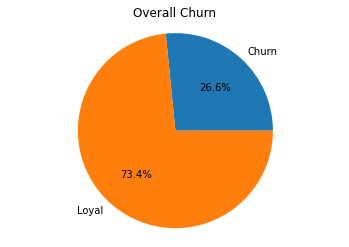

In [14]:
churnRate = round((df[df.Churn == 'Yes'].shape[0]/df.shape[0])*100, 2)
sc_data = [churnRate, 100.00-churnRate]
labels = 'Churn','Loyal'
plt.pie(sc_data,labels=labels,autopct='%1.1f%%')
plt.title('Overall Churn')
plt.axis('equal')
plt.show()

**Demographics**

*Age*

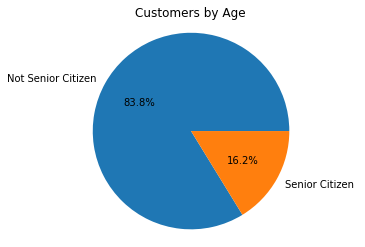

In [15]:
# Pie chart by age; make these f(x)
sc_data = [(df.SeniorCitizen == 0).sum()/df.shape[0]*100,
           (df.SeniorCitizen == 1).sum()/df.shape[0]*100]
labels = 'Not Senior Citizen','Senior Citizen'
plt.pie(sc_data,labels=labels,autopct='%1.1f%%')
plt.title('Customers by Age')
plt.axis('equal')
plt.show()

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

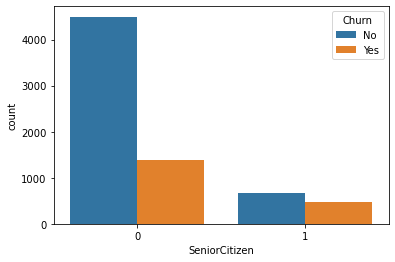

In [16]:
sns.countplot(x = 'SeniorCitizen',hue = 'Churn' ,data =df)

In [17]:
# gets churn for each unique value in column 
def getChurn(df, col):
    uniqueValues = list(df[col].unique())
    churn_dict = dict()
    for value in uniqueValues:
        data = df.loc[df[col] == value]
        churn = round(data[data.Churn == 'Yes'].shape[0]/data.shape[0]*100,2)
        churn_dict[value] = churn
    return churn_dict

age_churn = getChurn(df, 'SeniorCitizen')

print('Non-senior Churn:', age_churn[0], "%\n")
print('Senior Churn:', age_churn[1], "%\n")

Non-senior Churn: 23.65 %

Senior Churn: 41.68 %



Seniors Churn is signifigantly higher than overall and non-senior churn.

May be a good predictor

*Dependents*

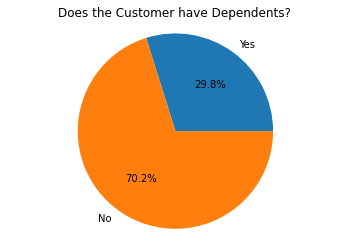

In [18]:
# dependents
dep_data = [(df.Dependents == 'Yes').sum()/df.shape[0]*100,
            (df.Dependents == 'No').sum()/df.shape[0]*100]
labels = 'Yes','No'
plt.pie(dep_data,labels=labels,autopct='%1.1f%%')
plt.title('Does the Customer have Dependents?')
plt.axis('equal')
plt.show()

<AxesSubplot:xlabel='Dependents', ylabel='count'>

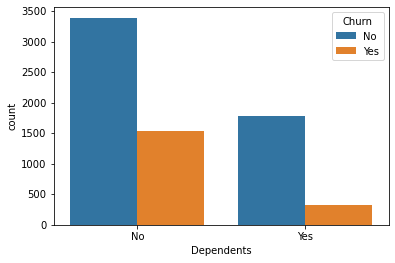

In [19]:
sns.countplot(x = 'Dependents', hue = 'Churn', data = df)

In [20]:
getChurn(df, 'Dependents')

{'No': 31.28, 'Yes': 15.53}

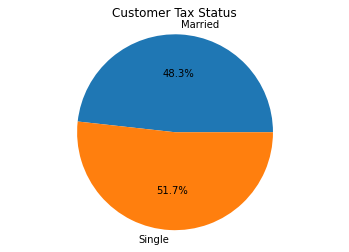

In [21]:
#Filing status 
partner_data = [(df.Partner == 'Yes').sum()/df.shape[0]*100,
                (df.Partner == 'No').sum()/df.shape[0]*100]
labels = 'Married','Single'
plt.pie(partner_data,labels=labels,autopct='%1.1f%%')
plt.title('Customer Tax Status')
plt.axis('equal')
plt.show()

<AxesSubplot:xlabel='Partner', ylabel='count'>

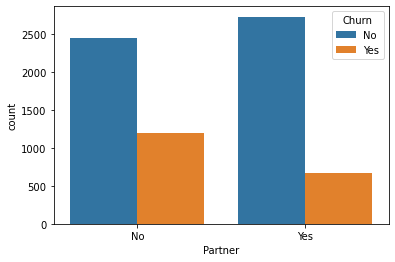

In [22]:
sns.countplot(x = 'Partner', hue = 'Churn', data = df)

In [23]:
getChurn(df, 'Partner')

{'Yes': 19.72, 'No': 32.98}

**Customer account information**

*Tenure*

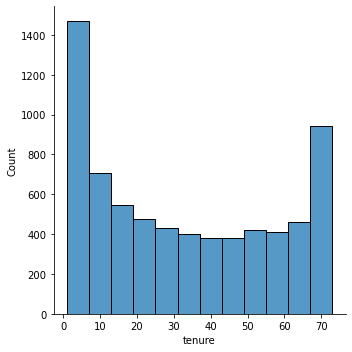

In [24]:
sns.displot(df['tenure'], binwidth = 6)

Top 2 customer groups

- 0-6 months
- 66-72 months

Text(0.5, 1.0, 'Tenure Boxplot')

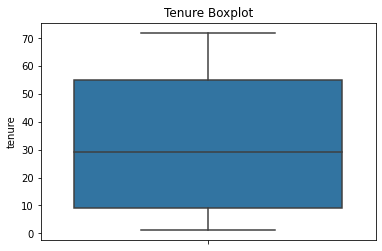

In [25]:
tenure_plot = sns.boxplot(y = "tenure", data = df)
tenure_plot.set_title('Tenure Boxplot')

- 50% of customers are with Telco between 10-55 months 
- Typical customer is with Telco for 30 months 

Text(0.5, 1.0, 'Tenure vs Churn')

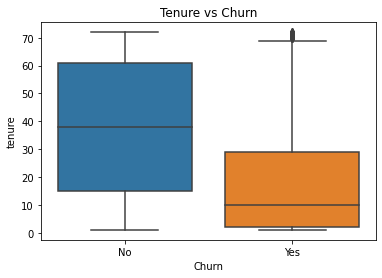

In [26]:
ten_vs_churn = sns.boxplot(x = "Churn", y = "tenure", data = df)
ten_vs_churn.set_title('Tenure vs Churn')

- 75% of customers that churn are with Telco for 30 months or less
- Typical customer that churned was with the company for 10 months

In [27]:
oneYearTenure = round(df[df.tenure <=30].shape[0]/df.shape[0]*100,2)
print("Percentage of customers with the company for 30 months or less:",oneYearTenure,"%")

Percentage of customers with the company for 30 months or less: 51.62 %


- More than half of the customer base has been with the company for 30 months or less 

*Monthly Charges*

Text(0.5, 1.0, 'Monthly Charges Boxplot')

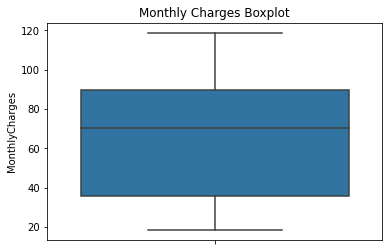

In [28]:
MonthlyCharges_plot = sns.boxplot(y = "MonthlyCharges", data = df)
MonthlyCharges_plot.set_title('Monthly Charges Boxplot')

- Mean: ~ 70
- IQR: ~35-90

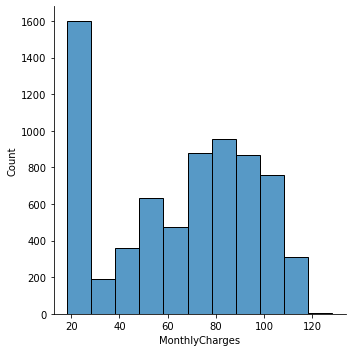

In [29]:
sns.displot(df['MonthlyCharges'], binwidth = 10)

Most frequent amount paid: 
- 18.25 - 28.25

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

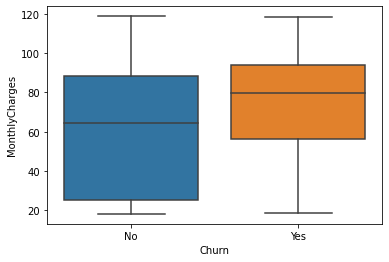

In [30]:
sns.boxplot(x = "Churn", y = "MonthlyCharges", data = df)

- Customer that churned tends to pay higher than a loyal customer

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

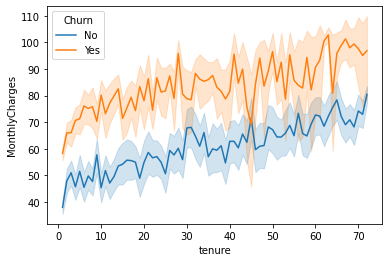

In [31]:
sns.lineplot(x = "tenure", y = "MonthlyCharges", data = df, hue='Churn')

*Contract*

<AxesSubplot:xlabel='Contract', ylabel='count'>

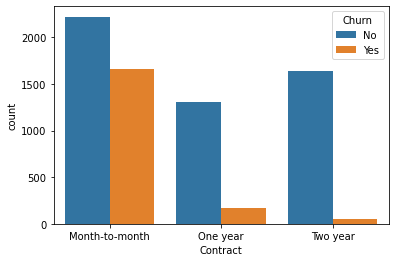

In [32]:
sns.countplot(x = df.Contract,hue = df.Churn)

In [33]:
getChurn(df, 'Contract')

{'Month-to-month': 42.71, 'One year': 11.28, 'Two year': 2.85}

Observations: 
- Churn is likely with Month-to-month contracts 

**Feature Selection**

<AxesSubplot:>

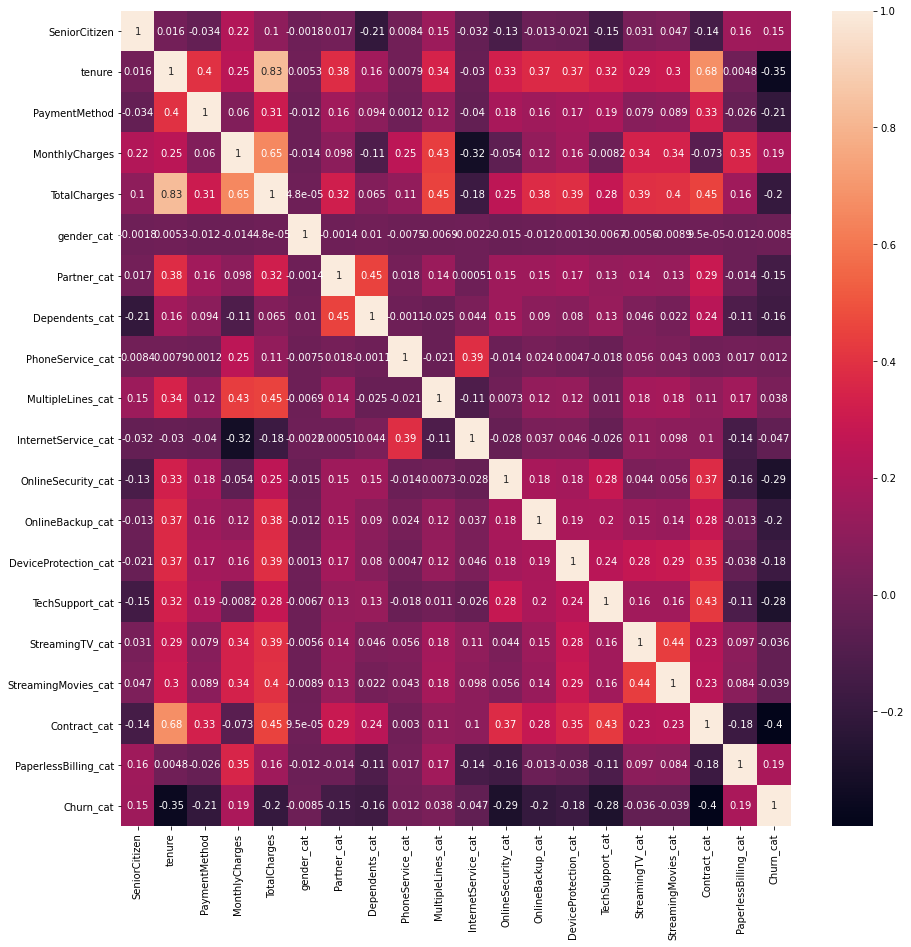

In [34]:
fig_dims = (15,15)
fig, ax = plt.subplots(figsize = fig_dims)
sns.heatmap(df.corr(), ax=ax, annot=True)

In [35]:
df.var()

SeniorCitizen           1.360459e-01
tenure                  6.024698e+02
PaymentMethod           2.458851e-01
MonthlyCharges          9.051658e+02
TotalCharges            5.138252e+06
gender_cat              2.500135e-01
Partner_cat             2.497296e-01
Dependents_cat          2.094246e-01
PhoneService_cat        8.736218e-02
MultipleLines_cat       8.998938e-01
InternetService_cat     5.435690e-01
OnlineSecurity_cat      7.395345e-01
OnlineBackup_cat        7.750930e-01
DeviceProtection_cat    7.747141e-01
TechSupport_cat         7.424814e-01
StreamingTV_cat         7.837295e-01
StreamingMovies_cat     7.839062e-01
Contract_cat            6.937791e-01
PaperlessBilling_cat    2.414375e-01
Churn_cat               1.951711e-01
dtype: float64

In [36]:
#get target var
Y = df['Churn_cat']

cat_drop = list(df.select_dtypes(include = ['category']))

drop_cols = ['gender_cat', 'PhoneService_cat', 'MultipleLines_cat', 'InternetService_cat','StreamingTV_cat',
             'StreamingMovies_cat', 'Churn_cat','TotalCharges','SeniorCitizen','Dependents_cat' ]


drop_cols = cat_drop+ drop_cols

dfinal = df.copy()
dfinal = dfinal.drop(drop_cols, 1)
dfinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tenure                7032 non-null   int64  
 1   PaymentMethod         7032 non-null   int64  
 2   MonthlyCharges        7032 non-null   float64
 3   Partner_cat           7032 non-null   int8   
 4   OnlineSecurity_cat    7032 non-null   int8   
 5   OnlineBackup_cat      7032 non-null   int8   
 6   DeviceProtection_cat  7032 non-null   int8   
 7   TechSupport_cat       7032 non-null   int8   
 8   Contract_cat          7032 non-null   int8   
 9   PaperlessBilling_cat  7032 non-null   int8   
dtypes: float64(1), int64(2), int8(7)
memory usage: 587.8 KB


**Logistic Regression**

In [37]:
#split data into testing and training sets 
X_train, X_test, y_train, y_test = train_test_split(dfinal, Y,
                                                    test_size = .2,
                                                    shuffle = True)

In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs',max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [39]:
y_predicted = model.predict(X_test)
model.score(X_test,y_test)

0.8045486851457001

In [41]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_predicted)

0.19545131485429992

In [42]:
model.coef_

array([[-0.03008923, -0.34170112,  0.02507893,  0.01762082, -0.31319444,
        -0.14121081, -0.04505585, -0.26605305, -0.6892118 ,  0.40070698]])

In [43]:
model.intercept_

array([-1.28996045])